# **Machine Learning Project** : Airbnb Price Prediction and Insights


## Objective

 The main goal of this project is to predict the price of Airbnb listings by training model on previous data  


## Dataset Overview

### Independent variable(Features)
- (id,property_type	,room_type	,amenities	,accommodates	,bathrooms	,bed_type	,cancellation_policy	,cleaning_fee	,city	,description	,first_review	,host_has_profile_pic	,host_identity_verified	,host_response_rate	,host_since	,instant_bookable	,last_review	,latitude	,longitude	,name	,neighbourhood	,number_of_reviews	,review_scores_rating	,thumbnail_url	,zipcode	,bedrooms,	beds)

### Dependent variable(output)
- `log_price` (log of original price)

# Importing and Data Exploration

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data=pd.read_csv('Airbnb_data.csv', encoding='ISO-8859-1')


In [93]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Unnamed: 29,Unnamed: 30
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,NaN,NaN
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,NaN,NaN
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,NaN,NaN
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,NaN,NaN
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,NaN,NaN


In [94]:
data.shape

(74111, 31)

In [95]:
data.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
Unnamed: 29   

In [96]:
data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,Unnamed: 29,Unnamed: 30
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000,0.0,0.0
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868,NaN,NaN
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142,NaN,NaN
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,NaN,NaN
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000,NaN,NaN
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000,NaN,NaN
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000,NaN,NaN
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,NaN,NaN


In [97]:
data.isnull().sum().sort_values(ascending=False)

Unnamed: 30               74111
Unnamed: 29               74111
host_response_rate        18299
review_scores_rating      16722
first_review              15864
last_review               15827
thumbnail_url              8216
neighbourhood              6872
zipcode                     968
bathrooms                   200
host_has_profile_pic        188
host_identity_verified      188
host_since                  188
beds                        131
bedrooms                     91
description                   0
cancellation_policy           0
cleaning_fee                  0
city                          0
bed_type                      0
room_type                     0
amenities                     0
accommodates                  0
id                            0
log_price                     0
property_type                 0
instant_bookable              0
name                          0
longitude                     0
latitude                      0
number_of_reviews             0
dtype: i

## Data Cleaning and Preprocessing

- Removed unnecessary columns like `name`, `description`, `thumbnail_url`, etc., which are not useful for prediction.
- creating index list of object,numeric and bool column and assigning variable cat_cols,num_cols and bool_cols respectively


In [98]:
data.drop(columns=["Unnamed: 29","Unnamed: 30"],inplace=True)

In [99]:
data["name"].value_counts()

name
???????                                               18
?????????                                             17
????                                                  16
??????                                                14
?????                                                 13
                                                      ..
BEAUTIFUL Mediterranean STyle House                    1
1 Bedroom (Queen) Mins From JFK and Casino             1
Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&Shop     1
Full Rowhouse w/Patio & Balcony                        1
No.7 Queen Size Cozy Room ?????                        1
Name: count, Length: 73167, dtype: int64

In [100]:
data["thumbnail_url"].value_counts()

thumbnail_url
https://a0.muscache.com/im/pictures/70087089/bc66229a_original.jpg?aki_policy=small              3
https://a0.muscache.com/im/pictures/4491e5c5-33f6-4704-9887-76a059f86fda.jpg?aki_policy=small    2
https://a0.muscache.com/im/pictures/28563531/1000de61_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/105275678/2ec252ae_original.jpg?aki_policy=small             2
https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=small              2
                                                                                                ..
https://a0.muscache.com/im/pictures/751551d4-3a22-4f84-a14f-c04811d3fd7e.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/8ba850b8-7c00-44be-a8d3-8c640995b002.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/1a2878c7-7707-49e4-8342-d71dcc45794b.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/5d56c2fa-8e34-4c04-b0a9-bbb5a8dbec19.jpg?aki_policy=small  

In [101]:
data.drop(columns=["thumbnail_url","name","id","description"],inplace=True)

In [102]:
data.isnull().sum().sort_values(ascending=False)

host_response_rate        18299
review_scores_rating      16722
first_review              15864
last_review               15827
neighbourhood              6872
zipcode                     968
bathrooms                   200
host_has_profile_pic        188
host_since                  188
host_identity_verified      188
beds                        131
bedrooms                     91
accommodates                  0
room_type                     0
amenities                     0
property_type                 0
log_price                     0
cleaning_fee                  0
cancellation_policy           0
bed_type                      0
city                          0
instant_bookable              0
number_of_reviews             0
latitude                      0
longitude                     0
dtype: int64

In [103]:
cat_cols=data.dtypes[data.dtypes=="object"].index
cat_cols

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'neighbourhood', 'zipcode'],
      dtype='object')

In [104]:
num_cols=data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")].index
num_cols

Index(['log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [105]:
bool_cols=data.dtypes[data.dtypes=="bool"].index
bool_cols

Index(['cleaning_fee'], dtype='object')

## Checking and Treating outliers

- Checked for outliers and distribution of important numeric columns.
- Clip outier for upper and lower bound
- Also clip for categorical numeric data bedroom,bathroom,beds,etc.
 - Again clip data to remove outlier specifically for number_of_reviews
  

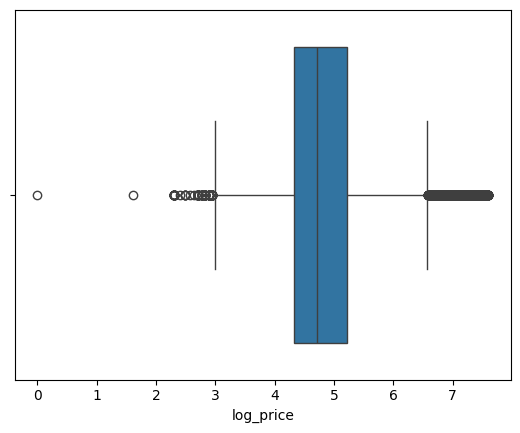

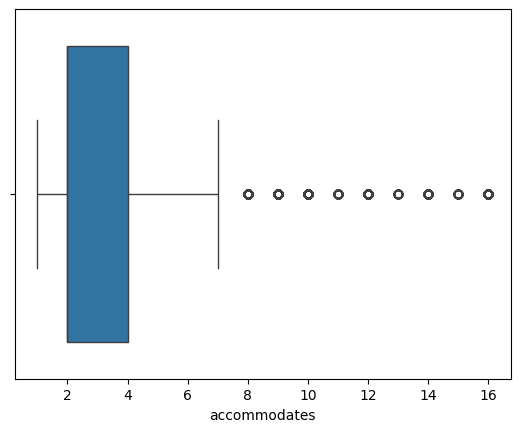

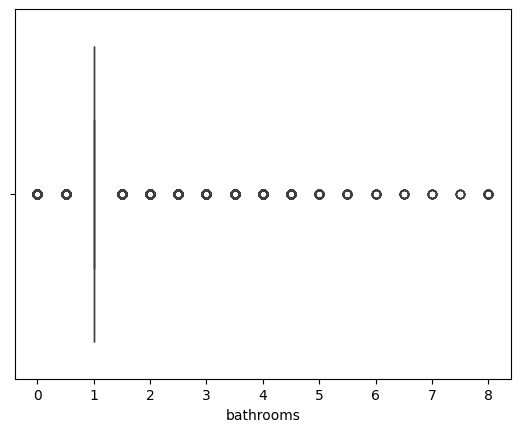

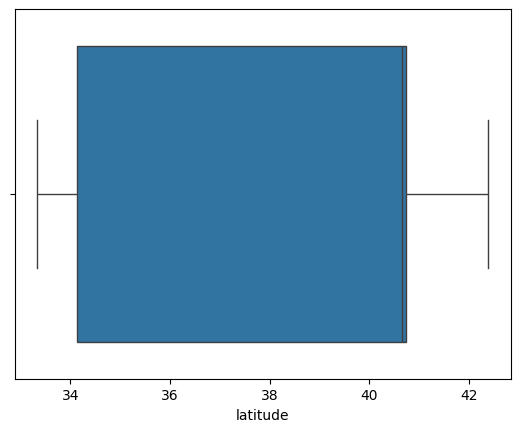

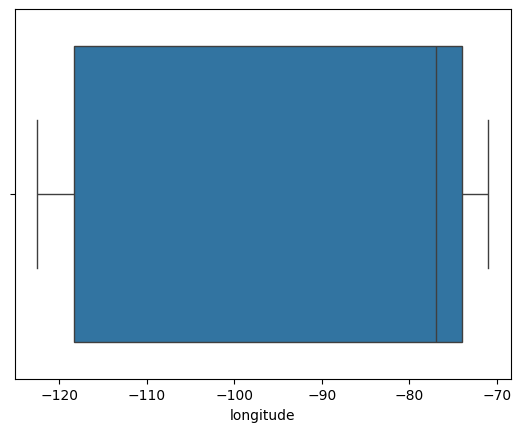

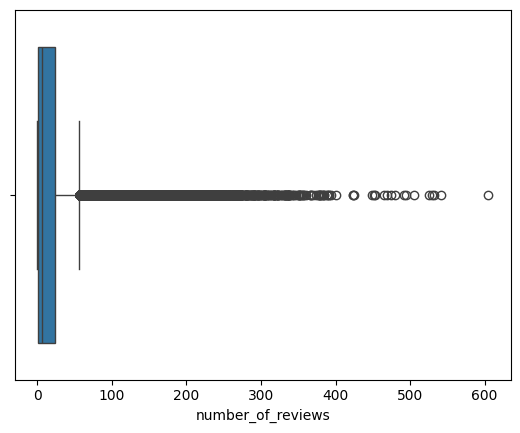

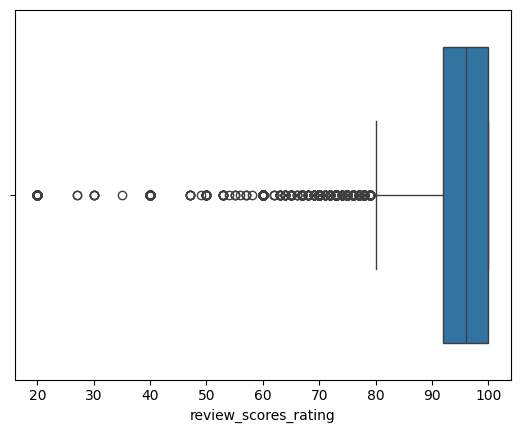

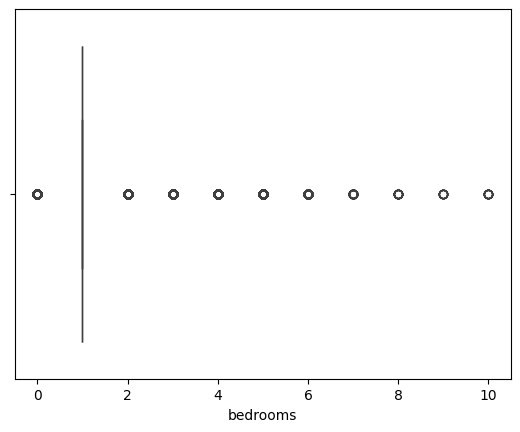

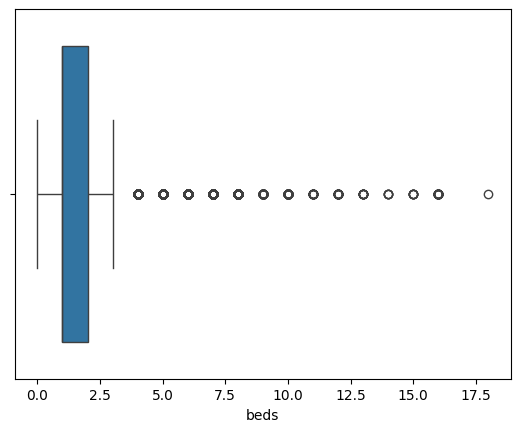

In [106]:
for i in num_cols:
    sns.boxplot(x=data[i])
    plt.show()

In [107]:
data.describe(percentiles=[0.01,0.02,0.03,0.05,0.06,0.11,0.25,0.50,0.85,0.90,0.95,0.96,0.97,0.98,0.99])

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
1%,3.367296,1.000000,1.000000,33.790138,-122.464508,0.000000,60.000000,0.000000,1.000000
2%,3.496508,1.000000,1.000000,33.873395,-122.444339,0.000000,73.000000,0.000000,1.000000
3%,3.583519,1.000000,1.000000,33.959518,-122.436274,0.000000,80.000000,0.000000,1.000000
5%,3.688879,1.000000,1.000000,33.989601,-122.422906,0.000000,80.000000,0.000000,1.000000
6%,3.806662,1.000000,1.000000,33.995608,-122.416511,0.000000,80.000000,0.000000,1.000000
11%,3.912023,1.000000,1.000000,34.045388,-118.490196,0.000000,87.000000,1.000000,1.000000


In [108]:
data['bedrooms'] = data['bedrooms'].clip(upper=5)  # Cap at 5+
data['bathrooms'] = data['bathrooms'].clip(upper=5)
data['beds'] = data['beds'].clip(upper=6)

In [109]:
cols_ofOutlier=['log_price','accommodates','number_of_reviews','review_scores_rating']

In [110]:
def outliers_treatment(x):
    x=x.clip(upper=x.quantile(0.95))
    x=x.clip(lower=x.quantile(0.05))
    return x

In [111]:
data["log_price"]=outliers_treatment(data["log_price"])

In [112]:
data[cols_ofOutlier]=data[cols_ofOutlier].apply(outliers_treatment)

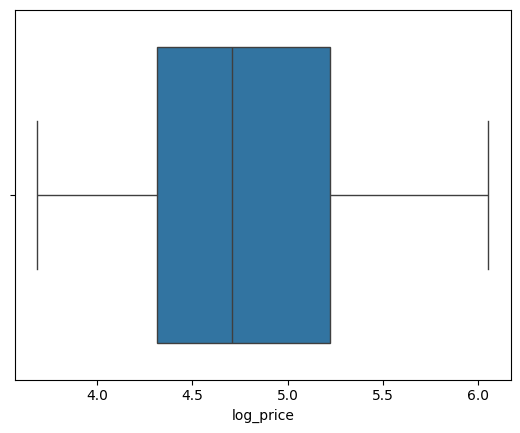

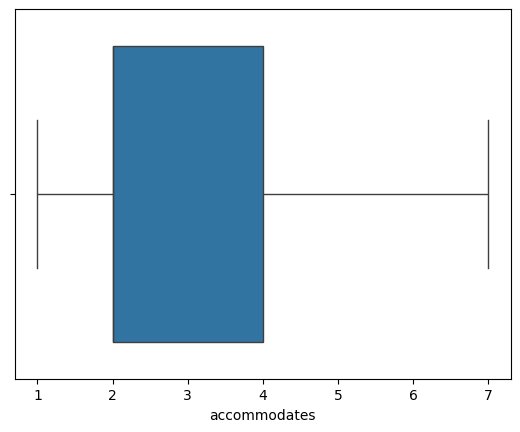

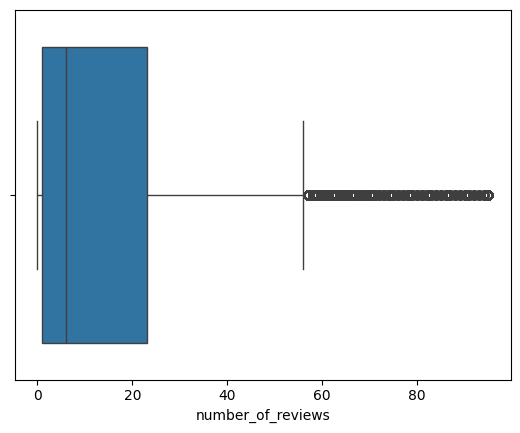

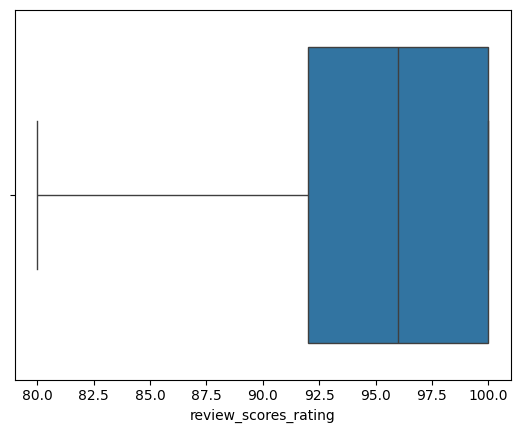

In [113]:
for i in cols_ofOutlier:
    sns.boxplot(x=data[i])
    plt.show()

In [114]:
data.describe(percentiles=[0.01,0.02,0.03,0.05,0.06,0.11,0.25,0.50,0.60,0.70,0.80,0.85,0.88,0.90,0.95,0.96,0.97,0.98,0.99])

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,4.768991,3.018067,1.232293,38.445958,-92.397525,18.162135,94.544146,1.261659,1.683928
std,0.639544,1.695036,0.556365,3.080167,21.705322,26.480014,5.815328,0.827624,1.099285
min,3.688879,1.000000,0.000000,33.338905,-122.511500,0.000000,80.000000,0.000000,0.000000
1%,3.688879,1.000000,1.000000,33.790138,-122.464508,0.000000,80.000000,0.000000,1.000000
2%,3.688879,1.000000,1.000000,33.873395,-122.444339,0.000000,80.000000,0.000000,1.000000
3%,3.688879,1.000000,1.000000,33.959518,-122.436274,0.000000,80.000000,0.000000,1.000000
5%,3.688879,1.000000,1.000000,33.989601,-122.422906,0.000000,80.000000,0.000000,1.000000
6%,3.806662,1.000000,1.000000,33.995608,-122.416511,0.000000,80.000000,0.000000,1.000000
11%,3.912023,1.000000,1.000000,34.045388,-118.490196,0.000000,87.000000,1.000000,1.000000


In [115]:
def outliers_manage(x):
    x=x.clip(upper=x.quantile(0.88))
    x=x.clip(lower=x.quantile(0.08))
    return x

In [116]:
data["number_of_reviews"]=outliers_manage(data["number_of_reviews"])

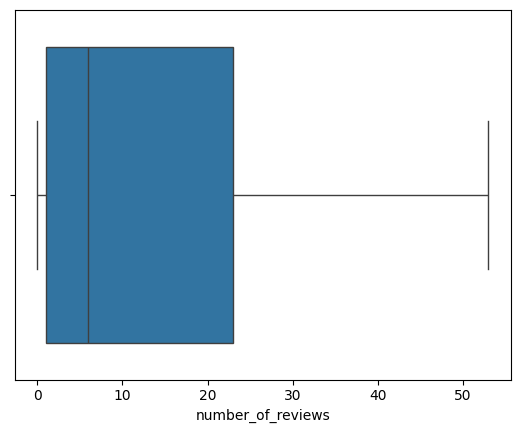

In [117]:
sns.boxplot(x=data["number_of_reviews"])
plt.show()

## Feature Engineering

In [118]:
# Count number of amenities
data['num_amenities'] = data['amenities'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)


In [119]:
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
data['host_experience_days'] = (pd.to_datetime('today') - data['host_since']).dt.days



C:\Users\swapn\AppData\Local\Temp\ipykernel_14840\2321997271.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')


In [120]:
data.dtypes

log_price                        float64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
first_review                      object
host_has_profile_pic              object
host_identity_verified            object
host_response_rate                object
host_since                datetime64[ns]
instant_bookable                  object
last_review                       object
latitude                         float64
longitude                        float64
neighbourhood                     object
number_of_reviews                  int64
review_scores_rating             float64
zipcode                           object
bedrooms                         float64
beds            

## LabelEncoding and Correlation

- plot correlation heatmap with encoded categorical data
- Tried to use correlation to select features, but got low correlation (maximum 0.53).
- So I decided to include more features based on logic and business understanding, not just correlation.


- Created a copy so original data secure and not mess up and Encoded all object columns

In [121]:
from sklearn.preprocessing import LabelEncoder

encoded_data = data.copy()

# Encode all object columns
label_cols = encoded_data.select_dtypes(include='object').columns

le = LabelEncoder()
for col in label_cols:
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))

In [122]:
data.dtypes

log_price                        float64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
first_review                      object
host_has_profile_pic              object
host_identity_verified            object
host_response_rate                object
host_since                datetime64[ns]
instant_bookable                  object
last_review                       object
latitude                         float64
longitude                        float64
neighbourhood                     object
number_of_reviews                  int64
review_scores_rating             float64
zipcode                           object
bedrooms                         float64
beds            

- calculated correlation and correlation heatmap shown

In [123]:
corr = encoded_data.corr()

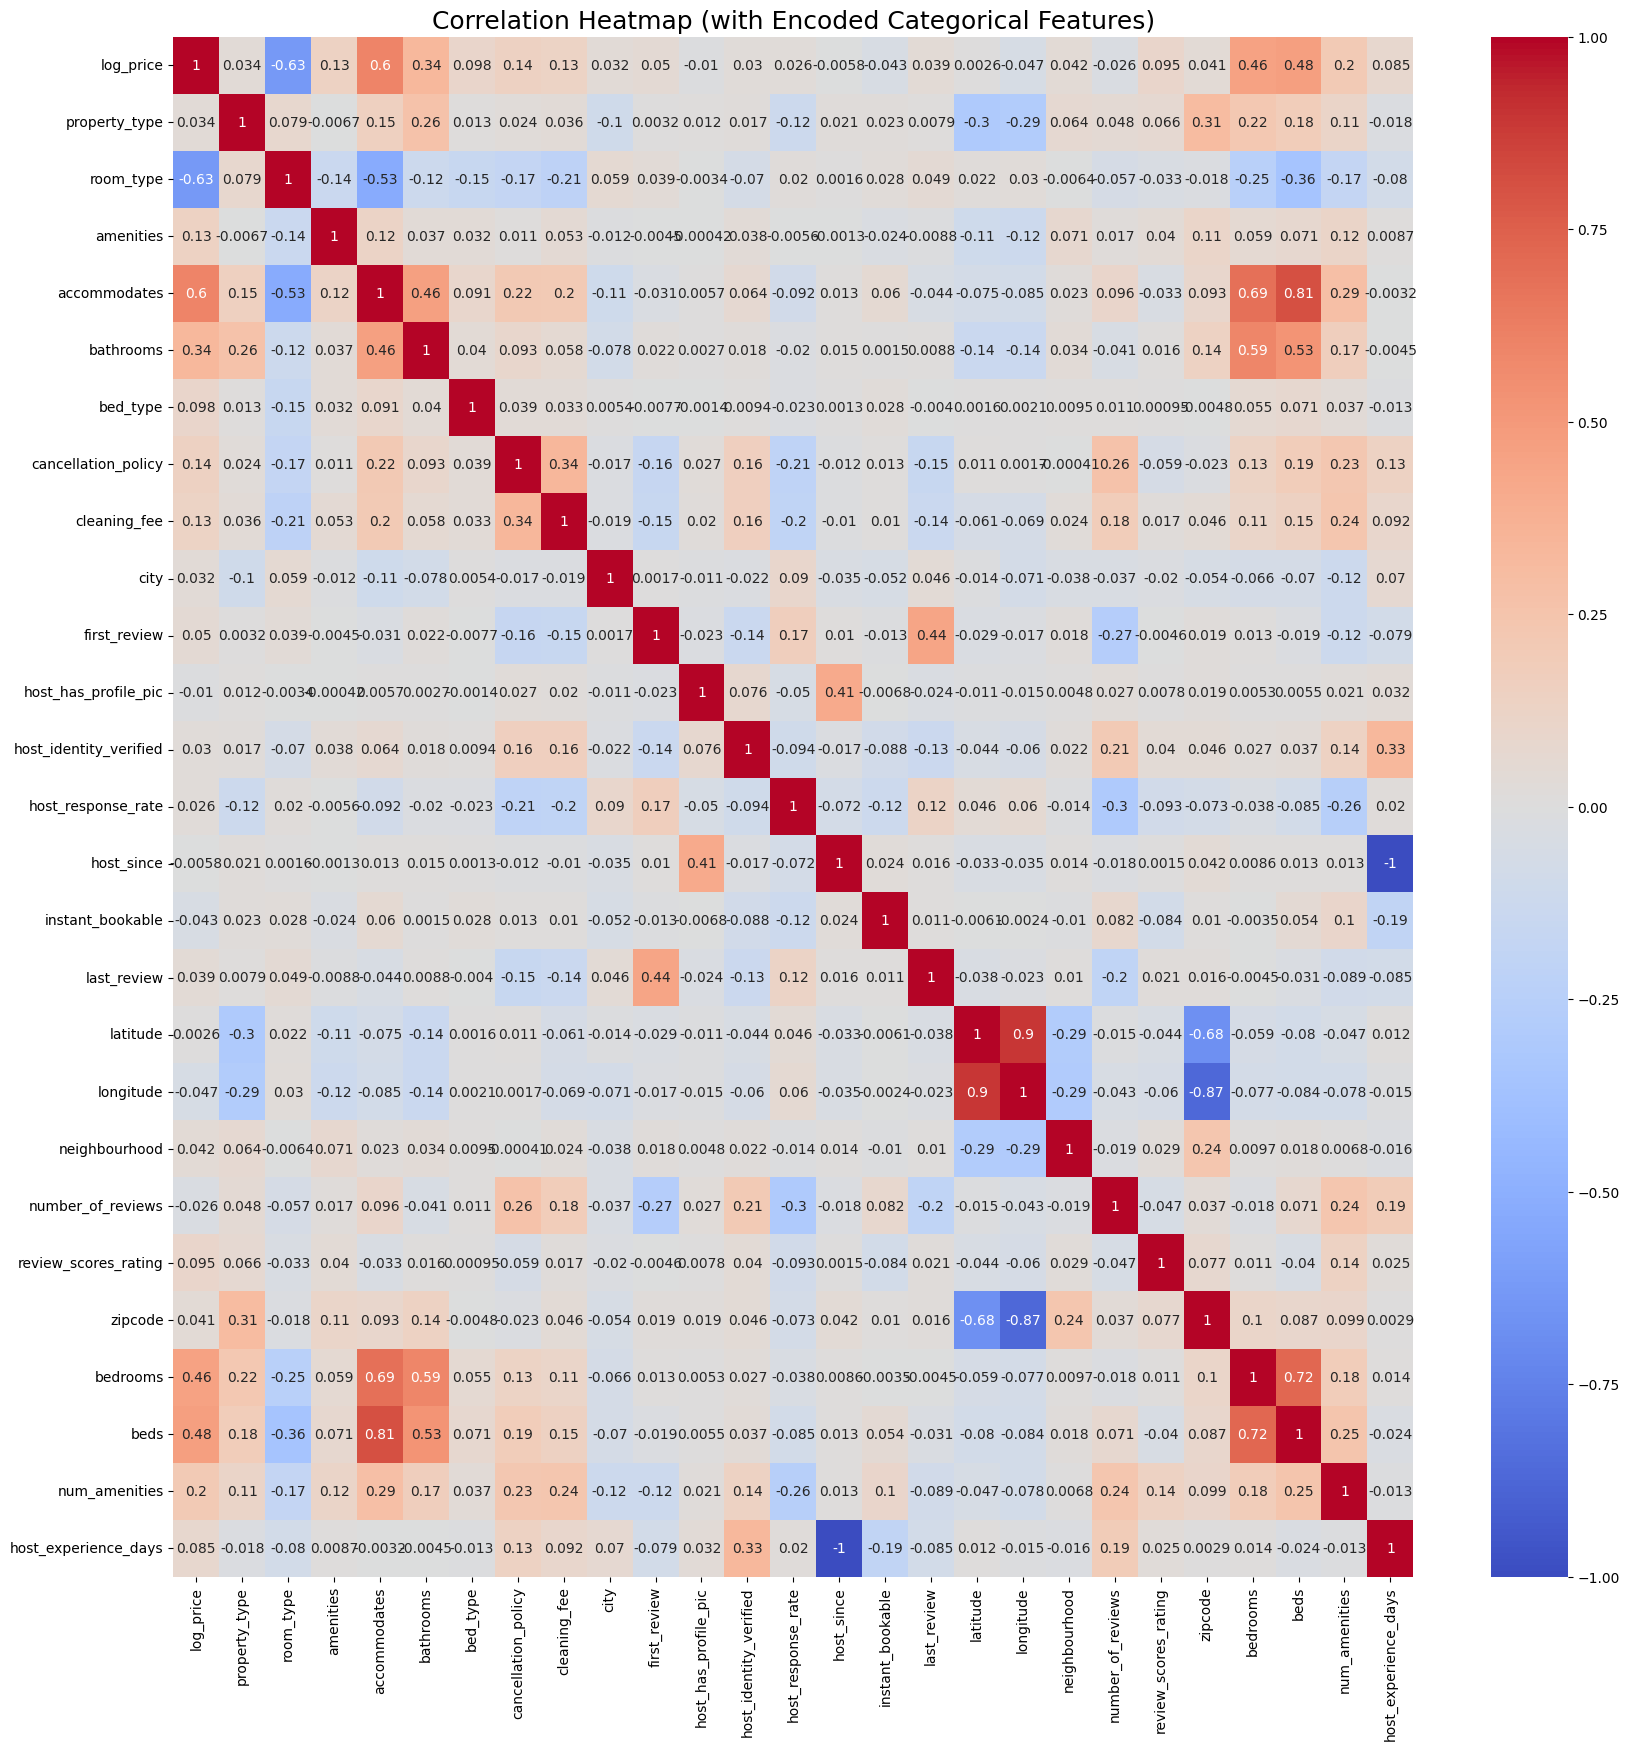

In [124]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap (with Encoded Categorical Features)", fontsize=18)
plt.show()


# Handling missing value 
- features based on logic,business understanding and by trail and error to get good R-squarenot value and not just correlation
- `selected feature`:('room_type','accommodates','amenities','bathrooms','bedrooms','beds','property_type','city',
                  'cancellation_policy','cleaning_fee','number_of_reviews')
- Also use one hot encoder to encode room_type

In [131]:
x = encoded_data[['room_type','accommodates','bathrooms','bedrooms','beds','property_type','city',
                  'cancellation_policy','cleaning_fee','number_of_reviews','num_amenities','host_experience_days']]
y = encoded_data['log_price']


In [132]:
data = data.dropna(subset=['host_experience_days'])


In [139]:
# Repeat label encoding for handling missing value

encoded_data = data.copy()

# Encode all object columns
label_cols = encoded_data.select_dtypes(include='object').columns

le = LabelEncoder()
for col in label_cols:
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))

In [134]:
x = encoded_data[['room_type','accommodates','bathrooms','bedrooms','beds','property_type','city',
                  'cancellation_policy','cleaning_fee','number_of_reviews','num_amenities','host_experience_days']]
y = encoded_data['log_price']

In [135]:
x['bathrooms'].fillna(x['bathrooms'].median(), inplace=True)
x['bedrooms'].fillna(x['bedrooms'].median(), inplace=True)
x['beds'].fillna(x['beds'].median(), inplace=True)

C:\Users\swapn\AppData\Local\Temp\ipykernel_14840\1377098489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['bathrooms'].fillna(x['bathrooms'].median(), inplace=True)
C:\Users\swapn\AppData\Local\Temp\ipykernel_14840\1377098489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['bathrooms'].fillna(x['bathrooms'].median(), inplace=Tru

In [136]:
x.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
property_type           0
city                    0
cancellation_policy     0
cleaning_fee            0
number_of_reviews       0
num_amenities           0
host_experience_days    0
dtype: int64

In [137]:
y.shape

(73923,)

In [138]:
x.shape


(73923, 12)

### using one hot encoder

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('room_type', OneHotEncoder(drop='first'), ['room_type'])
    ],
    remainder='passthrough'  # keeps 'accommodates'
)


# **Model Building**

First, I tried **Linear Regression** but the R² score was around 0.50, which was not good enough.

Then I used **Random Forest Regressor** and the score improved.

Later I tuned the Random Forest model using **GridSearchCV** to find the best parameters.


## Train-test split

In [82]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(59138, 12)
(14785, 12)
(59138,)
(14785,)


## Linear Regression

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(x_train, y_train)


C:\Users\swapn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('room_type',
                                                  OneHotEncoder(drop='first'),
                                                  ['room_type'])])),
                ('regressor', LinearRegression())])

### Linear Regrssion evaluation

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(x_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.3401835130338758
RMSE: 0.43285761165227016
R² Score: 0.5484930558873691


In [85]:
print("Training score",model.score(x_train,y_train))
print("Testing score",model.score(x_test,y_test))

Training score 0.5428461596126943
Testing score 0.5484930558873691


## Random forest

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


y_pred_rf = rf_model.predict(x_test)




In [87]:
print(rf_model.score(x_train,y_train))
print(rf_model.score(x_test,y_test))

0.9430646985125153
0.6015718743696356


In [140]:
train_score = rf_model.score(x_train, y_train)
test_score = rf_model.score(x_test, y_test)

print("Train score:", train_score)
print("Test score:", test_score)


Train score: 0.9430646985125153
Test score: 0.6015718743696356


In [89]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("MAE             :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE            :", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R²: 0.6015718743696356
MAE             : 0.3131550784119859
RMSE            : 0.40661915728909026


## finding best result by gridsearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [53]:
# 2. Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)


In [54]:
# 3. Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,                # 3-fold cross validation
                           scoring='r2',        # Optimize for R²
                           n_jobs=-1,           # Use all cores
                           verbose=2)

In [55]:
# 4. Fit the model
grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [59]:
# 5. Get the best model
best_rf = grid_search.best_estimator_


In [60]:
# 6. Predict on test set
y_pred = best_rf.predict(x_test)

In [141]:
print("Train score:",best_rf.score(x_train,y_train))
print("Test score:",best_rf.score(x_test,y_test))

Train score: 0.6477399256635569
Test score: 0.6142744684795727


In [62]:
# 7. Evaluate performance
print(" Best Parameters :", grid_search.best_params_)
print("Tuned R² Score  :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))


 Best Parameters : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned R² Score  : 0.6142744684795727
MAE : 0.3113286032086157
RMSE : 0.40008478422453775


# Factor affecting listing price

- Room Type: Entire homes cost more than private/shared rooms.

- Accommodates: Listings for more people are priced higher.

- Bathrooms, Bedrooms, Beds: Bigger properties mean higher prices.

- Property Type: Villas and houses are costlier than apartments.

- City: Popular cities or locations charge more.

- Cancellation Policy: Flexible policies can affect pricing.

- Cleaning Fee: Higher fees add to total cost.

- Number of Reviews: More reviews = more trust = potentially higher price.

- Amenities Count: More features = more value = higher price.

- Host Experience: Experienced hosts often charge more.



# Loom video limk
https://www.loom.com/share/1c4731649ac0464d8b4bd033a676d44a?sid=fddcbf75-2493-4a55-9bda-cd5eb10b421c

# Drive video link

https://drive.google.com/file/d/1xMAZ2_KdMRVRleZmsokp2Em6nCXHrR8V/view?usp=sharing